# CS4487 Group Project (Group 

# 1.	Introduction

The realism of bogus content has dramatically increased with the development of deep learning technologies. These fake photos can be further broken down into deepfake and face-to-face fake images. Modern deepfake images are primarily created by Generative Adversarial Networks, as opposed to face-to-face fake photos, which are normally created by changing a source's facial expression into a target. Someone might use deepfake photos for illicit purposes if we are unable to tell those fake facial images apart from genuine faces with accuracy. As a result, research in DeepFake Detection has picked up steam.

Three channel facial photographs with the size of 299 * 299 are the inputs for this course project, and the desired output is a binary label indicating whether or not a particular image is false. There are 12,000 photos total in the training set, with the labels f2f fake, deep fake, and real, respectively. The ratio of fake to actual images, if we generalise the f2f fake and deep fake as fake images, is 2 to 1.

2,985 unviewed photos make up the test dataset. To train a representative model on the full training set and attain the highest test accuracy on the test set is the goal that we are trying to accomplish.

When faced with a common image classification issue, it makes sense to consider a cutting-edge solution, such as a deep neutral network. Additionally, there have been many alternative network models developed over the years, some of which have produced state-of-the-art results in picture classification tasks. Our team has selected a few well-known network models and individually evaluated each one's performance.


# 2.	Data-preprocessing & Model Selection

Split Ratio: 8:2 ( 6:4 and 9:1 is not good as the training set an validation set is too small respectively)

In [1]:
import sys
import sklearn
import tensorflow as tf
import os
import sys
import numpy as np
import pandas as pd
import cv2
from keras import layers, Model

import cv2
import pandas as pd
import numpy as np

import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib import pyplot as plt

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
import zipfile
real=[]
fake=[]
zip1 = zipfile.ZipFile('data.zip')
p_list=zip1.namelist()
p_list.remove('data/')
p_list.remove('data/manipulated/')
p_list.remove('data/original/')
for x in range(8000):
    fake.append(p_list[x])
for x in range(1,4001):
    real.append(p_list[-x])

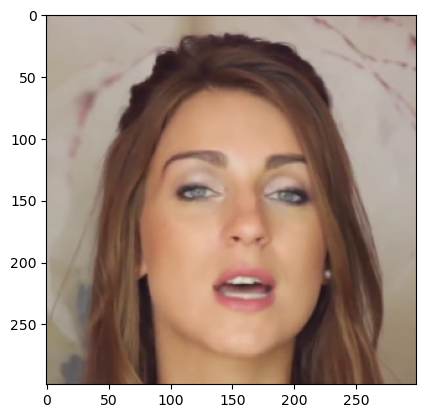

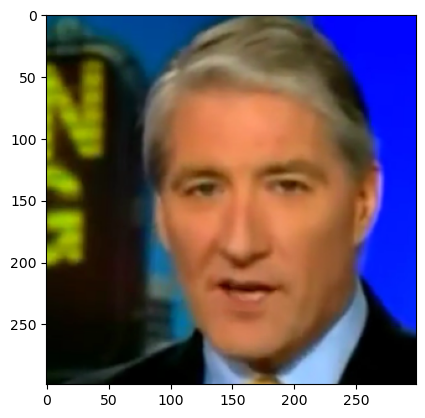

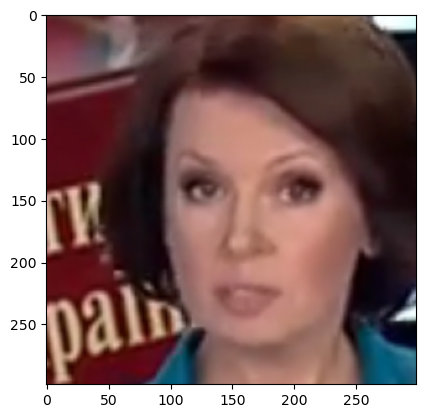

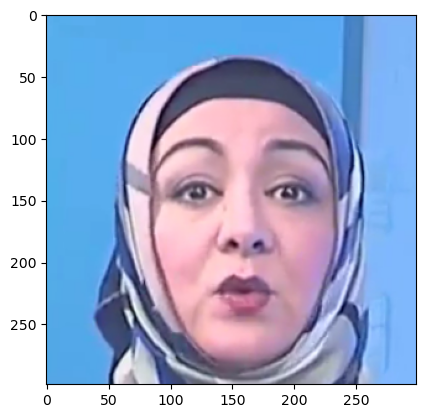

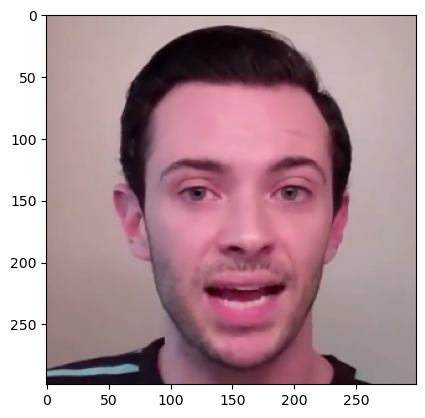

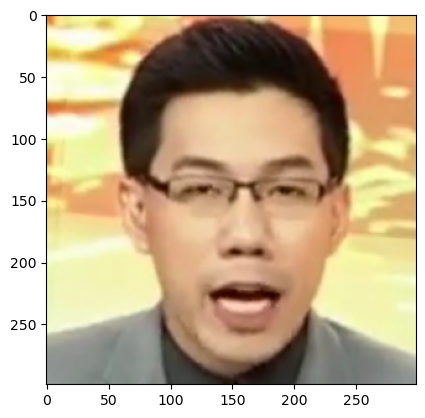

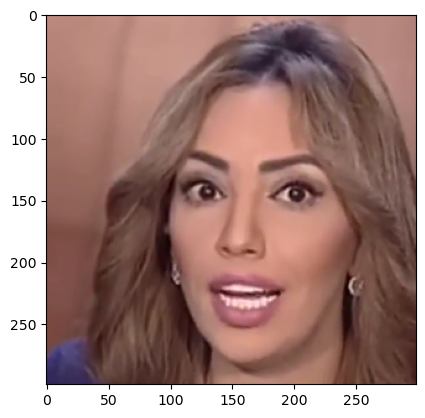

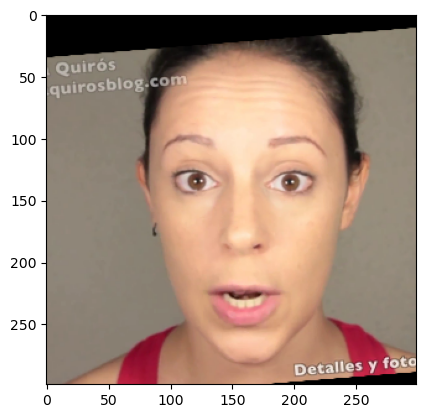

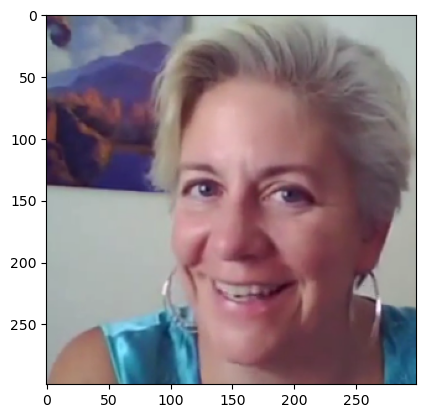

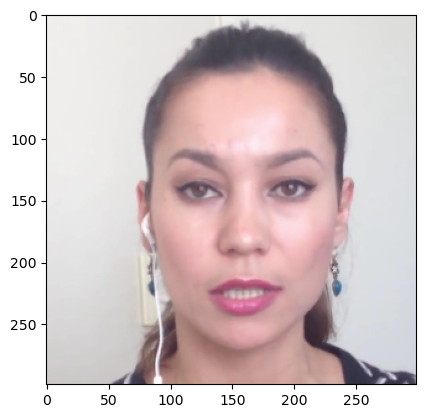

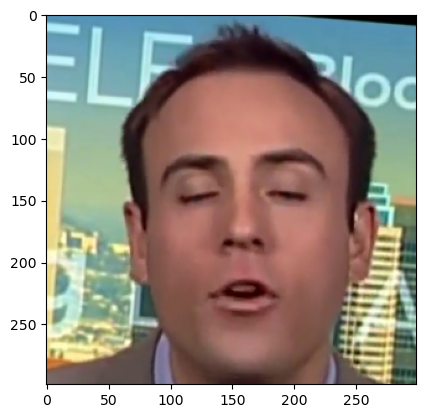

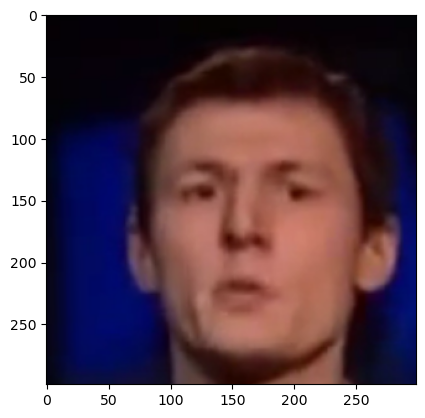

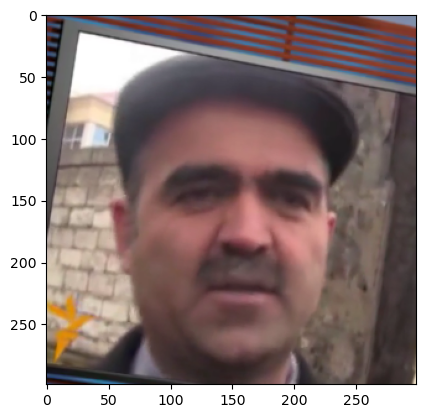

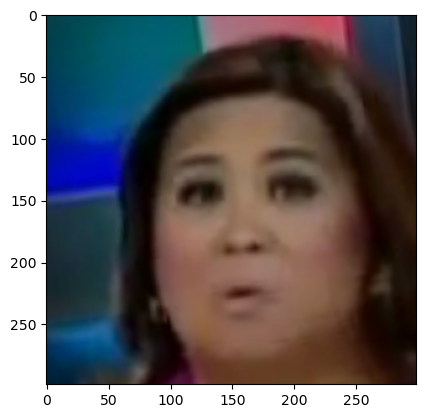

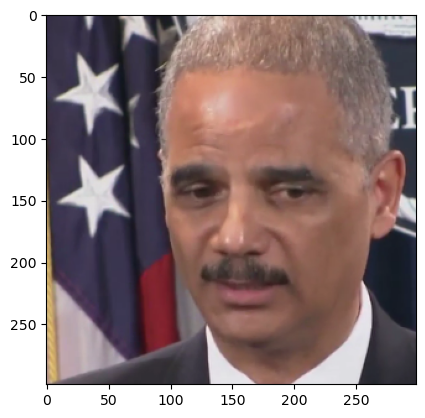

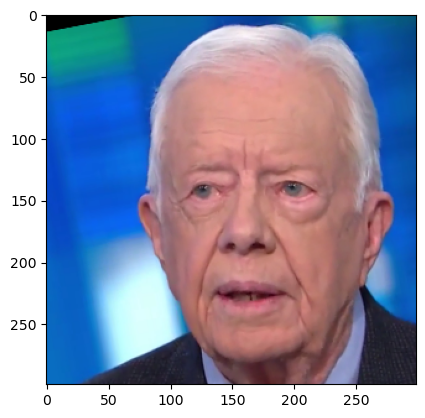

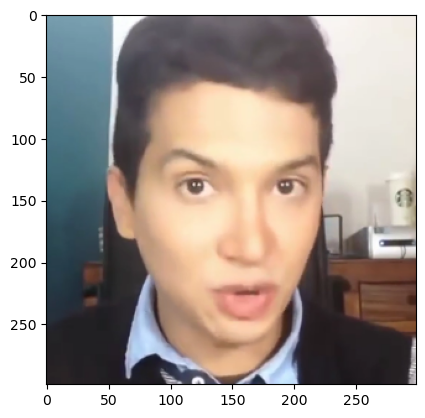

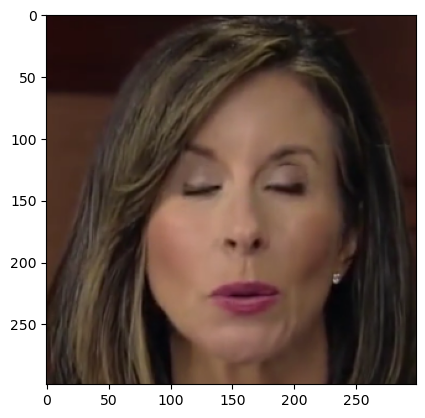

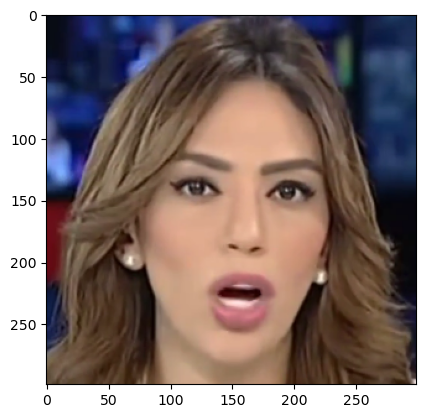

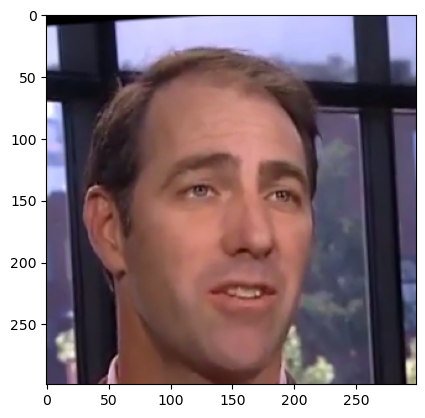

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
for i in range(20):
    ifile=zip1.open(real[i])
    img = Image.open(ifile)
    plt.imshow(img)
    plt.show() 

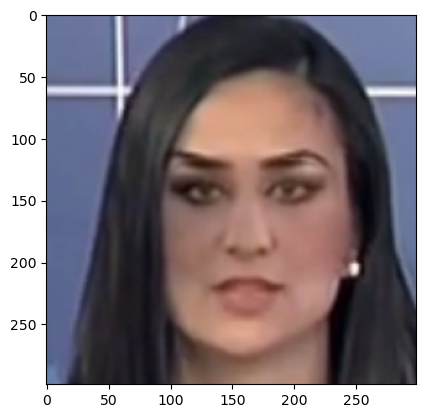

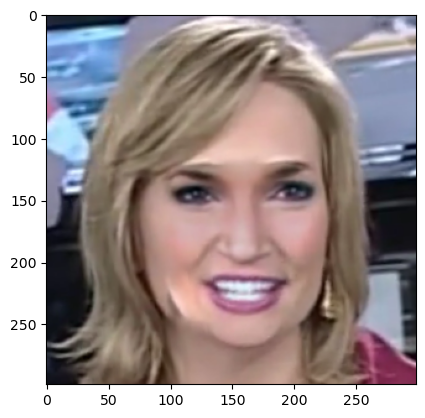

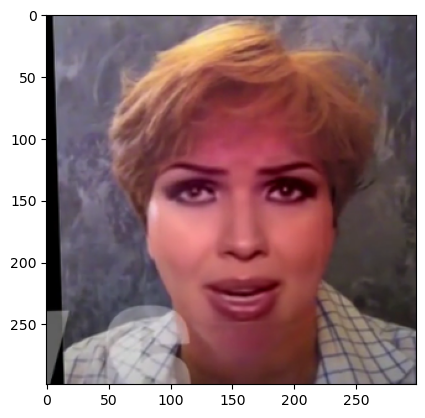

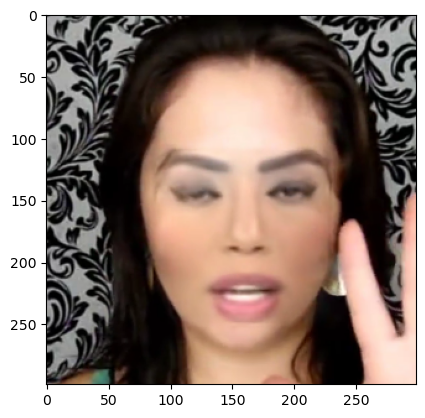

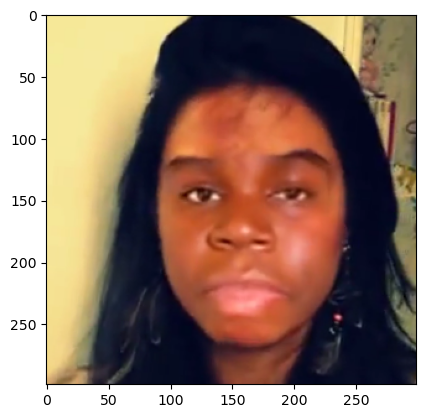

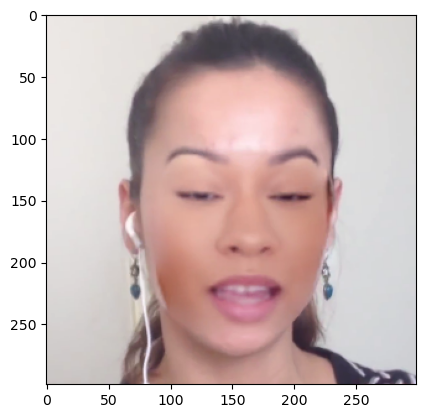

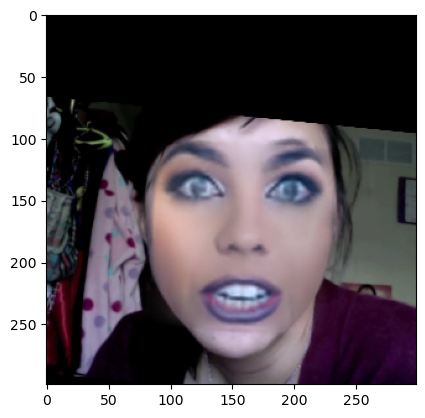

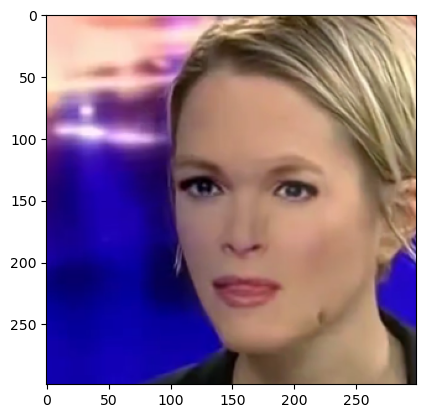

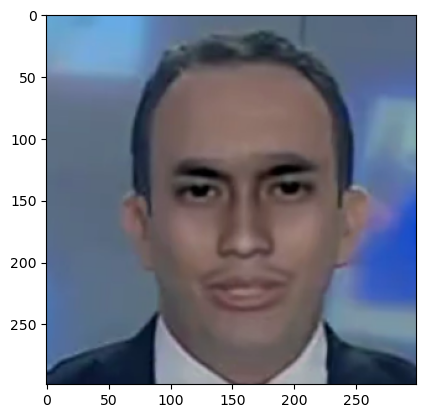

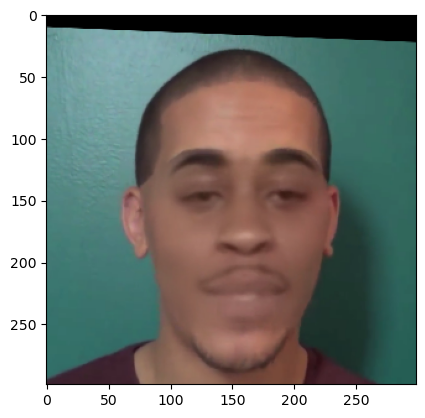

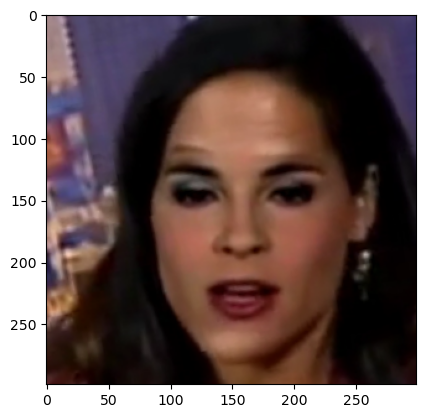

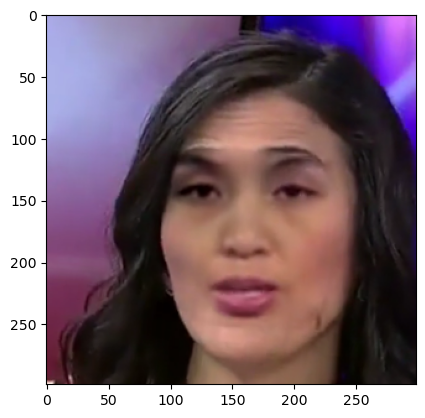

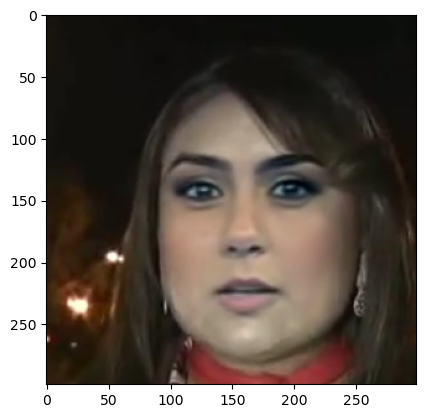

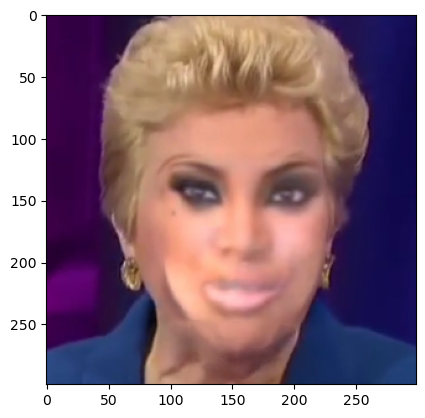

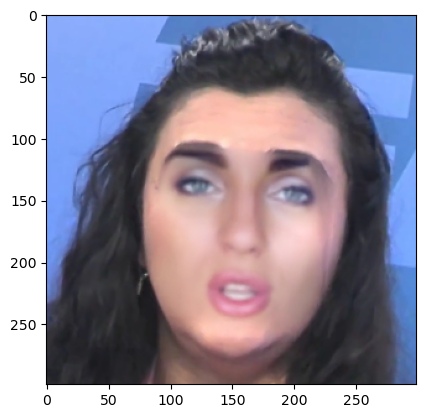

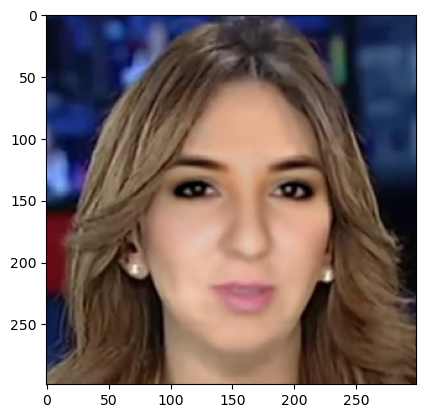

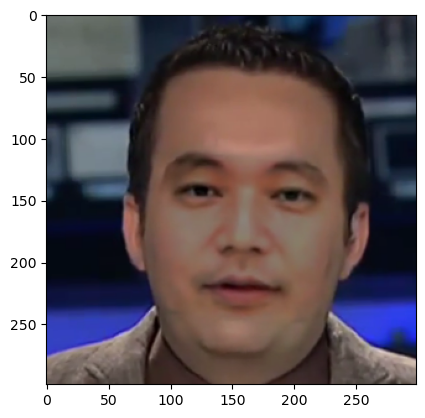

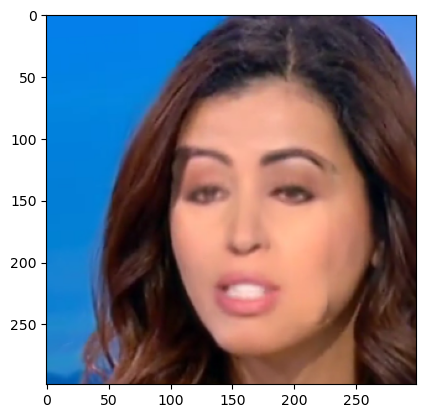

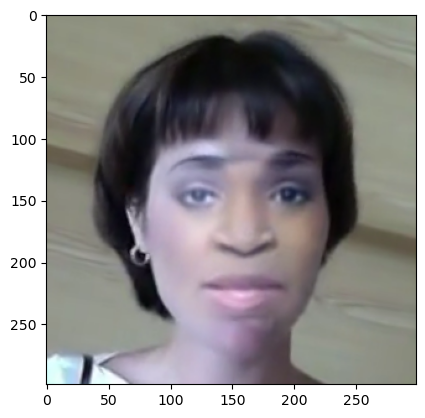

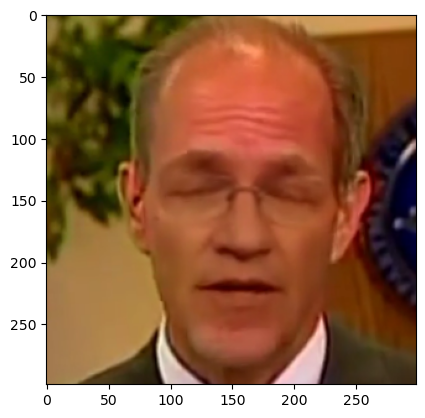

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
for i in range(20):
    ifile=zip1.open(fake[i])
    img = Image.open(ifile)
    plt.figure()
    plt.imshow(img)

In [4]:
import torch
from torchvision import transforms
from PIL import Image

In [5]:
from PIL import Image
from numpy import asarray
real_array=[]
for p in range(4000):
    img = cv2.imread(real[p],cv2.IMREAD_UNCHANGED)
    real_array.append(img)
real_array=np.array(real_array)
len(real_array)

4000

In [6]:
fake_array=[]
for p in range(8000):
    img = cv2.imread(fake[p],cv2.IMREAD_UNCHANGED)
    fake_array.append(img)
fake_array=np.array(fake_array)
len(fake_array)

8000

In [7]:
final_x=np.concatenate((real_array, fake_array))
final_x.shape

(12000, 299, 299, 3)

In [8]:
real_y=np.full((4000,), 0)
fake_y=np.full((8000,), 1)
final_y=np.concatenate((real_y, fake_y))
final_y.shape

(12000,)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.2,random_state=42)
class_names = ['Real','Fake']

In [16]:
%store X_train
%store y_train
%store y_test
%store X_test

Stored 'X_train' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'X_test' (ndarray)


In [8]:
%store -r

# Model: CNN | VGG16 | RESnet50 | Xception | EfficientNetV2L | VGG19 |

# CNN

In [29]:
from keras.applications.inception_v3 import InceptionV3
model = keras.Sequential([
keras.layers.Flatten(input_shape=(299, 299,3)),
tf.keras.layers.Dense(100, activation='relu'),
tf.keras.layers.Dense(50, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
960/960 [==============================] - 299s 310ms/step - loss: 475.7675 - accuracy: 0.5586
Epoch 2/10
960/960 [==============================] - 299s 312ms/step - loss: 8.3261 - accuracy: 0.6696
Epoch 3/10
960/960 [==============================] - 301s 313ms/step - loss: 0.6351 - accuracy: 0.6696
Epoch 4/10
960/960 [==============================] - 302s 314ms/step - loss: 0.6346 - accuracy: 0.6696
Epoch 5/10
960/960 [==============================] - 287s 299ms/step - loss: 0.6346 - accuracy: 0.6696
Epoch 6/10
960/960 [==============================] - 280s 291ms/step - loss: 0.6346 - accuracy: 0.6696
Epoch 7/10
960/960 [==============================] - 280s 291ms/step - loss: 0.6346 - accuracy: 0.6696
Epoch 8/10
960/960 [==============================] - 284s 295ms/step - loss: 0.6346 - accuracy: 0.6696
Epoch 9/10
960/960 [==============================] - 290s 302ms/step - loss: 0.6346 - accuracy: 0.6696
Epoch 10/10
960/960 [==============================] - 314s 32

In [32]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

75/75 [==============================] - 3s 35ms/step - loss: 0.6445 - accuracy: 0.6550
Test accuracy: 0.6549999713897705


# VGG16 

In [10]:
#try
from keras.applications import VGG16
pretrained_model = VGG16(include_top=False, weights='imagenet')
from keras.utils import to_categorical
vgg_features_train = pretrained_model.predict(X_train)

300/300 [==============================] - 1319s 4s/step


In [11]:
vgg_features_train.shape

(9600, 9, 9, 512)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
model2 = Sequential()
model2.add(Flatten(input_shape=(9,9,512)))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [13]:
vgg16=model2.fit(vgg_features_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
75/75 [==============================] - 5s 59ms/step - loss: 0.7264 - accuracy: 0.5814
Epoch 2/100
75/75 [==============================] - 5s 61ms/step - loss: 0.5816 - accuracy: 0.6865
Epoch 3/100
75/75 [==============================] - 5s 61ms/step - loss: 0.5231 - accuracy: 0.7295
Epoch 4/100
75/75 [==============================] - 4s 59ms/step - loss: 0.4753 - accuracy: 0.7561
Epoch 5/100
75/75 [==============================] - 4s 58ms/step - loss: 0.4322 - accuracy: 0.7812
Epoch 6/100
75/75 [==============================] - 4s 57ms/step - loss: 0.4079 - accuracy: 0.7996
Epoch 7/100
75/75 [==============================] - 4s 57ms/step - loss: 0.3760 - accuracy: 0.8135
Epoch 8/100
75/75 [==============================] - 4s 59ms/step - loss: 0.3633 - accuracy: 0.8207
Epoch 9/100
75/75 [==============================] - 5s 61ms/step - loss: 0.3378 - accuracy: 0.8367
Epoch 10/100
75/75 [==============================] - 4s 57ms/step - loss: 0.3306 - accuracy: 0.8351

75/75 [==============================] - 5s 61ms/step - loss: 0.1342 - accuracy: 0.9365
Epoch 83/100
75/75 [==============================] - 4s 58ms/step - loss: 0.1286 - accuracy: 0.9403
Epoch 84/100
75/75 [==============================] - 4s 58ms/step - loss: 0.1346 - accuracy: 0.9377
Epoch 85/100
75/75 [==============================] - 4s 59ms/step - loss: 0.1348 - accuracy: 0.9356
Epoch 86/100
75/75 [==============================] - 4s 59ms/step - loss: 0.1307 - accuracy: 0.9382
Epoch 87/100
75/75 [==============================] - 4s 58ms/step - loss: 0.1333 - accuracy: 0.9375
Epoch 88/100
75/75 [==============================] - 4s 57ms/step - loss: 0.1267 - accuracy: 0.9391
Epoch 89/100
75/75 [==============================] - 4s 59ms/step - loss: 0.1252 - accuracy: 0.9410
Epoch 90/100
75/75 [==============================] - 4s 57ms/step - loss: 0.1234 - accuracy: 0.9431
Epoch 91/100
75/75 [==============================] - 4s 58ms/step - loss: 0.1257 - accuracy: 0.9406
Epo

In [17]:
from joblib import Parallel, delayed
import joblib
joblib.dump(model2, 'vgg16.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-05 01:29:00         2255
metadata.json                                  2022-12-05 01:29:00           64
variables.h5                                   2022-12-05 01:29:00     49798104


['vgg16.pkl']

In [80]:
vgg_features_test = pretrained_model.predict(X_test)
test_loss, test_acc = model2.evaluate(vgg_features_test, y_test)
print('Test accuracy:', test_acc)

75/75 [==============================] - 1s 6ms/step - loss: 1.1469 - accuracy: 0.7054
Test accuracy: 0.7054166793823242


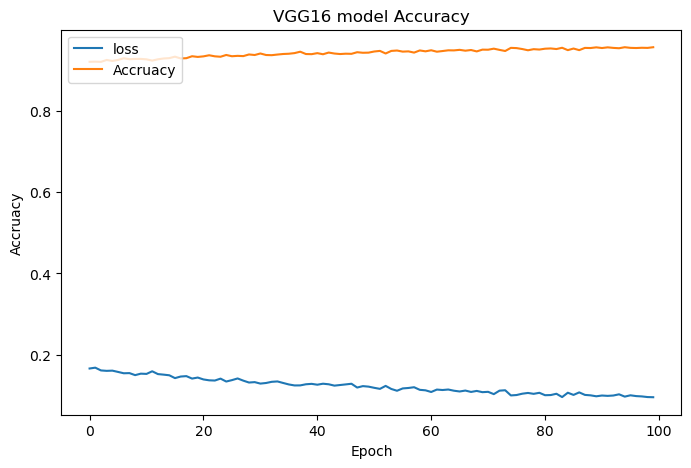

In [82]:
pd.DataFrame(vgg16.history).plot(figsize=(8,5))
plt.title('VGG16 model Accuracy')
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['loss', 'Accruacy'], loc='upper left')
plt.show()

# Resnet 50

In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50
pretrained_model_rn50 = ResNet50(include_top=False, weights='imagenet', input_tensor=None,input_shape=(299,299,3))
vgg_features_train_rn50 = pretrained_model_rn50.predict(X_train)

300/300 [==============================] - 754s 3s/step


In [14]:
vgg_features_train_rn50.shape

(9600, 10, 10, 2048)

In [54]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
model_res50 = Sequential()
model_res50.add(Flatten(input_shape=(10,10,2048)))
model_res50.add(Dense(100, activation='relu'))
model_res50.add(Dropout(0.5))
model_res50.add(BatchNormalization())
model_res50.add(Dense(1, activation='sigmoid'))

# compile the model
model_res50.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
res50=model_res50.fit(vgg_features_train_rn50, y_train, epochs=50, batch_size=128)



Epoch 1/50
75/75 [==============================] - 30s 372ms/step - loss: 0.7435 - accuracy: 0.5947
Epoch 2/50
75/75 [==============================] - 21s 281ms/step - loss: 0.6109 - accuracy: 0.6725
Epoch 3/50
75/75 [==============================] - 20s 269ms/step - loss: 0.5331 - accuracy: 0.7197
Epoch 4/50
75/75 [==============================] - 20s 269ms/step - loss: 0.4725 - accuracy: 0.7557
Epoch 5/50
75/75 [==============================] - 20s 268ms/step - loss: 0.4293 - accuracy: 0.7845
Epoch 6/50
75/75 [==============================] - 20s 268ms/step - loss: 0.4045 - accuracy: 0.8040
Epoch 7/50
75/75 [==============================] - 20s 271ms/step - loss: 0.3814 - accuracy: 0.8154
Epoch 8/50
75/75 [==============================] - 21s 277ms/step - loss: 0.3630 - accuracy: 0.8257
Epoch 9/50
75/75 [==============================] - 21s 279ms/step - loss: 0.3460 - accuracy: 0.8316
Epoch 10/50
75/75 [==============================] - 22s 290ms/step - loss: 0.3277 - accura

In [18]:
vgg_features_test_rn50 = pretrained_model_rn50.predict(X_test)
test_loss, test_acc = model_res50.evaluate(vgg_features_test_rn50, y_test)
print('Test accuracy:', test_acc)

75/75 [==============================] - 2s 23ms/step - loss: 0.7522 - accuracy: 0.6971
Test accuracy: 0.6970833539962769


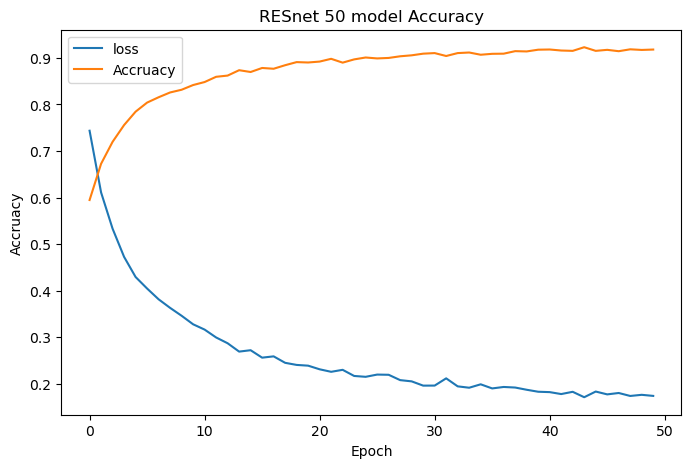

In [55]:
pd.DataFrame(res50.history).plot(figsize=(8,5))
plt.title('RESnet 50 model Accuracy')
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['loss', 'Accruacy'], loc='upper left')
plt.show()

# Xception

In [20]:
from tensorflow.keras.applications.xception import Xception
pretrained_model_xcept = Xception(include_top=False, weights='imagenet', input_tensor=None,input_shape=(299,299,3))
vgg_features_train_xcept = pretrained_model_xcept.predict(X_train)

300/300 [==============================] - 652s 2s/step


In [22]:
vgg_features_train_xcept.shape

(9600, 10, 10, 2048)

In [56]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
model_xcept = Sequential()
model_xcept.add(Flatten(input_shape=(10,10,2048)))
model_xcept.add(Dense(100, activation='relu'))
model_xcept.add(Dropout(0.5))
model_xcept.add(BatchNormalization())
model_xcept.add(Dense(1, activation='sigmoid'))

# compile the model
model_xcept.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
xcept=model_xcept.fit(vgg_features_train_rn50, y_train, epochs=50, batch_size=128)


Epoch 1/50
75/75 [==============================] - 23s 288ms/step - loss: 0.7412 - accuracy: 0.5828
Epoch 2/50
75/75 [==============================] - 21s 280ms/step - loss: 0.6175 - accuracy: 0.6581
Epoch 3/50
75/75 [==============================] - 21s 278ms/step - loss: 0.5427 - accuracy: 0.7091
Epoch 4/50
75/75 [==============================] - 22s 291ms/step - loss: 0.4779 - accuracy: 0.7557
Epoch 5/50
75/75 [==============================] - 21s 279ms/step - loss: 0.4341 - accuracy: 0.7803
Epoch 6/50
75/75 [==============================] - 21s 275ms/step - loss: 0.3973 - accuracy: 0.8062
Epoch 7/50
75/75 [==============================] - 21s 277ms/step - loss: 0.3669 - accuracy: 0.8228
Epoch 8/50
75/75 [==============================] - 21s 277ms/step - loss: 0.3471 - accuracy: 0.8347
Epoch 9/50
75/75 [==============================] - 21s 276ms/step - loss: 0.3239 - accuracy: 0.8426
Epoch 10/50
75/75 [==============================] - 21s 284ms/step - loss: 0.3066 - accura

In [24]:
vgg_features_test_xcept = pretrained_model_xcept.predict(X_test)
test_loss, test_acc = model_xcept.evaluate(vgg_features_test_xcept, y_test)
print('Test accuracy:', test_acc)

75/75 [==============================] - 2s 24ms/step - loss: 10.5030 - accuracy: 0.5508
Test accuracy: 0.5508333444595337


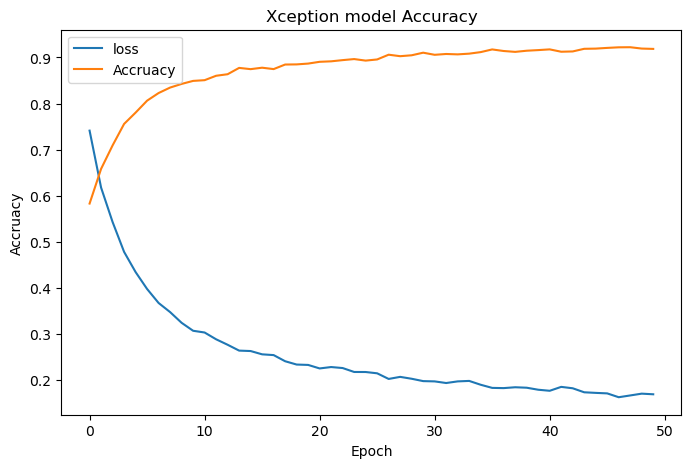

In [57]:
pd.DataFrame(xcept.history).plot(figsize=(8,5))
plt.title('Xception model Accuracy')
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['loss', 'Accruacy'], loc='upper left')
plt.show()

# EfficientNetV2L

In [29]:
from tensorflow.keras.applications import EfficientNetV2L
pretrained_model_enet = EfficientNetV2L(include_top=False, weights='imagenet', input_tensor=None,input_shape=(299,299,3))
vgg_features_train_enet = pretrained_model_enet.predict(X_train)

300/300 [==============================] - 2740s 9s/step


In [32]:
vgg_features_train_enet.shape

(9600, 10, 10, 1280)

In [58]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
model_enet = Sequential()
model_enet.add(Flatten(input_shape=(10,10,1280)))
model_enet.add(Dense(100, activation='relu'))
model_enet.add(Dropout(0.5))
model_enet.add(BatchNormalization())
model_enet.add(Dense(1, activation='sigmoid'))

# compile the model
model_enet.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
enet=model_enet.fit(vgg_features_train_enet, y_train, epochs=50, batch_size=128)


Epoch 1/50
75/75 [==============================] - 51s 666ms/step - loss: 0.7803 - accuracy: 0.5675
Epoch 2/50
75/75 [==============================] - 15s 195ms/step - loss: 0.6761 - accuracy: 0.6344
Epoch 3/50
75/75 [==============================] - 14s 189ms/step - loss: 0.6321 - accuracy: 0.6560
Epoch 4/50
75/75 [==============================] - 14s 187ms/step - loss: 0.6123 - accuracy: 0.6642
Epoch 5/50
75/75 [==============================] - 14s 186ms/step - loss: 0.5842 - accuracy: 0.6840
Epoch 6/50
75/75 [==============================] - 14s 184ms/step - loss: 0.5622 - accuracy: 0.6986
Epoch 7/50
75/75 [==============================] - 14s 189ms/step - loss: 0.5469 - accuracy: 0.7114
Epoch 8/50
75/75 [==============================] - 14s 183ms/step - loss: 0.5298 - accuracy: 0.7204
Epoch 9/50
75/75 [==============================] - 15s 200ms/step - loss: 0.5221 - accuracy: 0.7262
Epoch 10/50
75/75 [==============================] - 15s 205ms/step - loss: 0.5091 - accura

In [34]:
vgg_features_test_enet = pretrained_model_enet.predict(X_test)
test_loss, test_acc = model_enet.evaluate(vgg_features_test_enet, y_test)
print('Test accuracy:', test_acc)

75/75 [==============================] - 1s 15ms/step - loss: 0.8476 - accuracy: 0.6600
Test accuracy: 0.6600000262260437


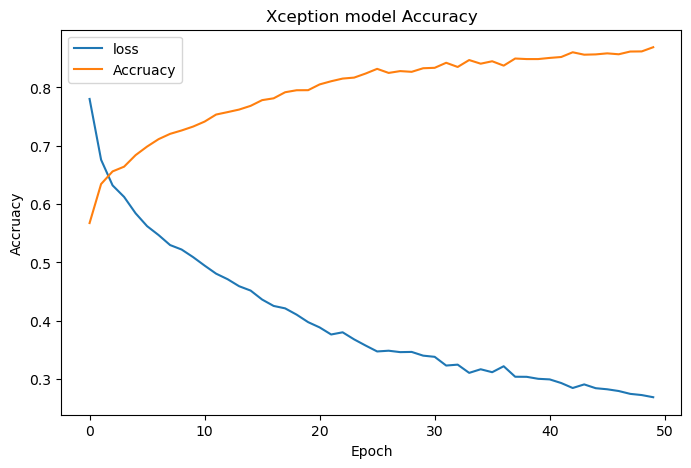

In [59]:
pd.DataFrame(enet.history).plot(figsize=(8,5))
plt.title('Xception model Accuracy')
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['loss', 'Accruacy'], loc='upper left')
plt.show()

# VGG19

In [60]:
from keras.applications.vgg19 import VGG19
pretrained_model_vgg19 = VGG19(include_top=False, weights='imagenet', input_tensor=None,input_shape=(299,299,3))
vgg_features_train_vgg19 = pretrained_model_vgg19.predict(X_train)

300/300 [==============================] - 1667s 6s/step


In [61]:
vgg_features_train_vgg19.shape

(9600, 9, 9, 512)

In [63]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
model_vgg19 = Sequential()
model_vgg19 .add(Flatten(input_shape=(9,9,512)))
model_vgg19 .add(Dense(100, activation='relu'))
model_vgg19 .add(Dropout(0.5))
model_vgg19 .add(BatchNormalization())
model_vgg19 .add(Dense(1, activation='sigmoid'))

# compile the model
model_vgg19 .compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
vgg19=model_vgg19 .fit(vgg_features_train_vgg19 , y_train, epochs=50,batch_size=128)

Epoch 1/50
75/75 [==============================] - 5s 62ms/step - loss: 0.7484 - accuracy: 0.5845
Epoch 2/50
75/75 [==============================] - 5s 67ms/step - loss: 0.5927 - accuracy: 0.6847
Epoch 3/50
75/75 [==============================] - 5s 65ms/step - loss: 0.5309 - accuracy: 0.7242
Epoch 4/50
75/75 [==============================] - 5s 64ms/step - loss: 0.4877 - accuracy: 0.7530
Epoch 5/50
75/75 [==============================] - 5s 63ms/step - loss: 0.4379 - accuracy: 0.7803
Epoch 6/50
75/75 [==============================] - 5s 64ms/step - loss: 0.4068 - accuracy: 0.7959
Epoch 7/50
75/75 [==============================] - 5s 64ms/step - loss: 0.3849 - accuracy: 0.8082
Epoch 8/50
75/75 [==============================] - 5s 64ms/step - loss: 0.3607 - accuracy: 0.8261
Epoch 9/50
75/75 [==============================] - 5s 65ms/step - loss: 0.3448 - accuracy: 0.8320
Epoch 10/50
75/75 [==============================] - 5s 64ms/step - loss: 0.3251 - accuracy: 0.8456
Epoch 11/

In [64]:
vgg_features_test_vgg19 = pretrained_model_vgg19.predict(X_test)
test_loss, test_acc = model_vgg19.evaluate(vgg_features_test_vgg19, y_test)
print('Test accuracy:', test_acc)

75/75 [==============================] - 1s 6ms/step - loss: 0.9358 - accuracy: 0.6917
Test accuracy: 0.6916666626930237


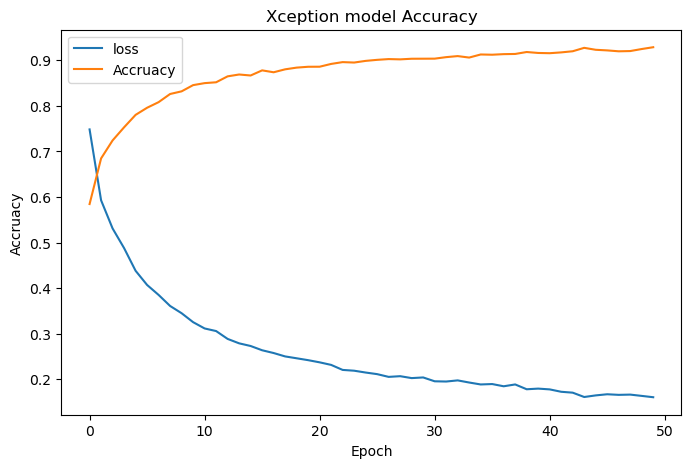

In [68]:
pd.DataFrame(vgg19.history).plot(figsize=(8,5))
plt.title('Xception model Accuracy')
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['loss', 'Accruacy'], loc='upper left')
plt.show()

# Results

In [86]:
accuracy=[0.6550,0.7054,0.6971,0.5508,0.6600,0.6917]
loss=[0.6445,1.1469,0.7522,10.5030,0.8476,0.9358]
Model=['CNN' , 'VGG16' , 'RESnet50' , 'Xception' , 'EfficientNetV2L' , 'VGG19' ]
df_acc,df_loss,df_model=pd.DataFrame(accuracy,columns=['Accuracy']),pd.DataFrame(loss,columns=['Loss']),pd.DataFrame(Model,columns=['Model'])
pd.concat([df_model, df_acc,df_loss], axis=1)

Model  Accuracy     Loss
0              CNN    0.6550   0.6445
1            VGG16    0.7054   1.1469
2         RESnet50    0.6971   0.7522
3         Xception    0.5508  10.5030
4  EfficientNetV2L    0.6600   0.8476
5            VGG19    0.6917   0.9358